## Introduction 
* Diabetes is a chronic (long-lasting) health condition that affects how your body turns food into energy. 
* Most of the food you eat is broken down into sugar (also called glucose) and released into your bloodstream.

### Dataset Informations
* **Name:** [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* **Feautres:** 9 clinical features for prediction 


## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
sns.set_style("darkgrid")

<a id ="1"></a><br>
# Read and Examination Dataset

In [2]:
data =pd.read_csv("https://raw.githubusercontent.com/OmarAtef0/Diabetes/main/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# Box Plot

<Figure size 400x400 with 0 Axes>

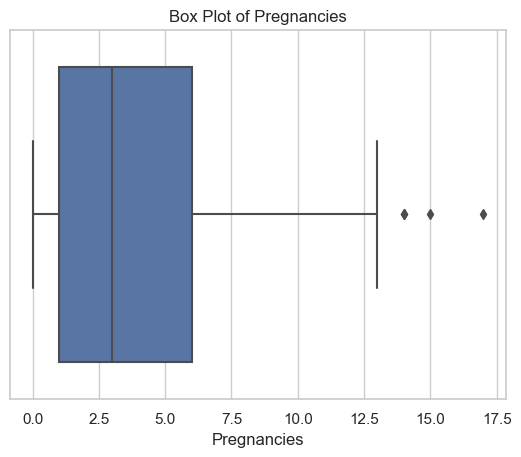

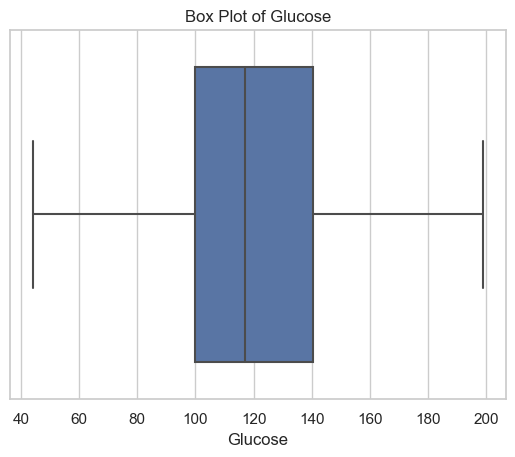

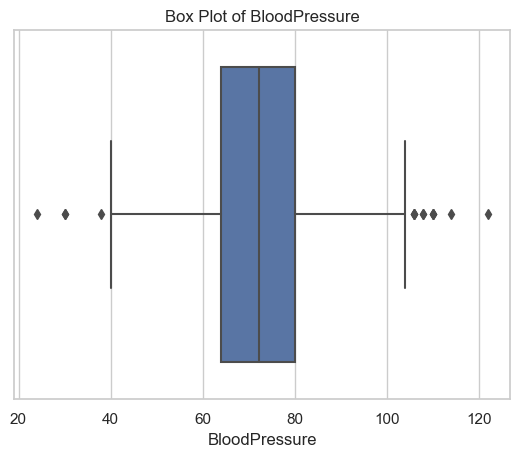

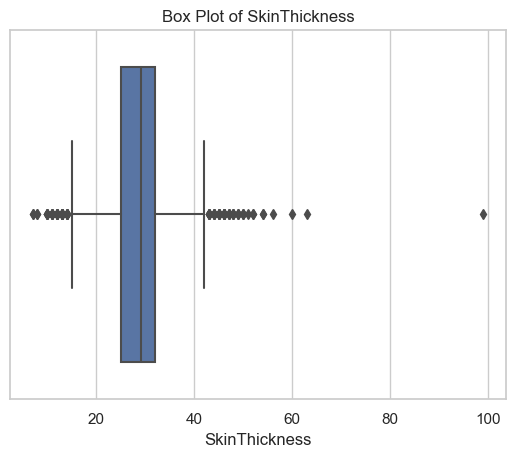

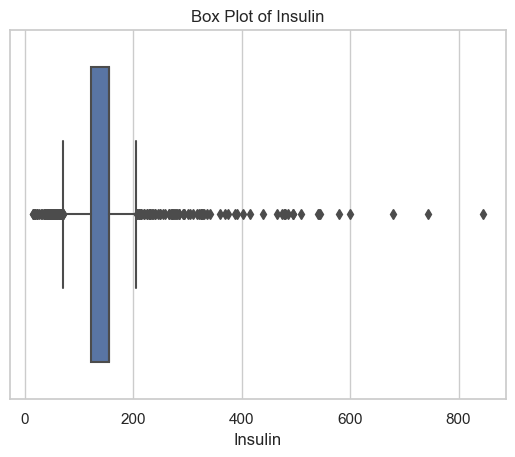

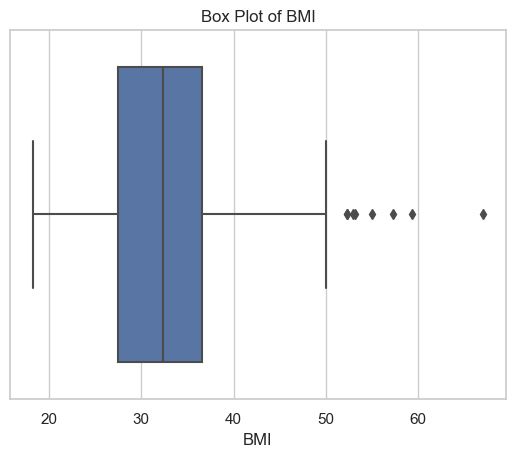

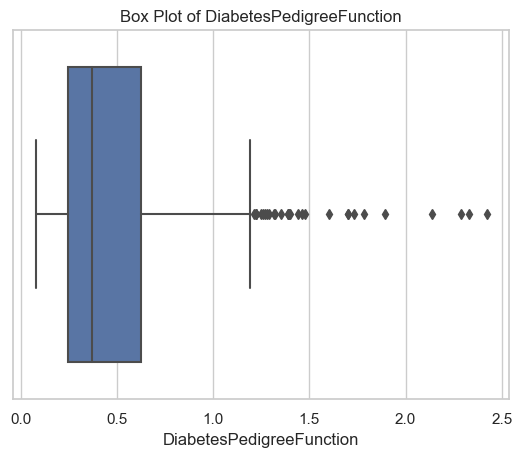

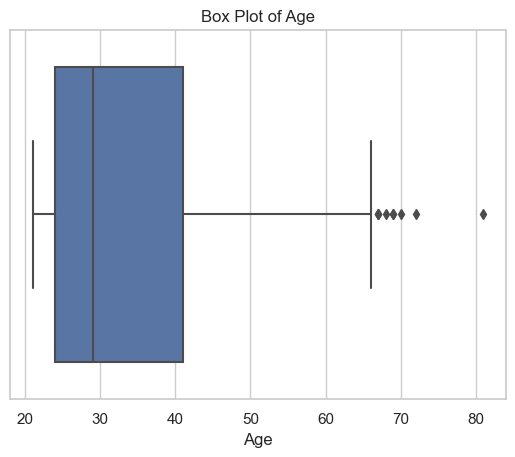

In [14]:
# Set the style and size of the plots
sns.set(style="whitegrid")
plt.figure(figsize=(4, 4))

# Loop through each column in the DataFrame
for col in data.columns[:len(data.columns)-1]:
    plt.figure()
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# Exploratory Data Analysis

In [4]:
# find categorical variables
# Categorical variables have data type object. Numerical variables have data type int64.

categorical = [i for i in data.columns if data[i].dtype == 'O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


In [5]:
# find quantitative variables

numerical = [i for i in data.columns if data[i].dtype != 'O']

print('There are {} quantitative variables\n'.format(len(numerical)))

print('The quantitative variables are :', numerical)

There are 9 quantitative variables

The quantitative variables are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


# Replacing zeros in all features except pregnancies with null

In [6]:
for col in data.columns[1:len(data.columns)-1]:
    # Replace 0 with NaN values using NumPy's where() function
    data[col] = np.where(data[col] == 0, np.nan, data[col])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


# Checking Null Values

In [7]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Replacing null values with mean to avoid data loss

In [8]:
for col in data.columns[:len(data.columns)-1]:
    col_mean = data[col].mean()
#     print(f"{col}  {col_mean}")
    data[col].fillna(col_mean, inplace=True)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1


# Identifying Outliers
to deal with outliers, there are two options depend on the distribution of data:
- <span style="color:blue;">1) Normal Distribution</span>: outliers are the points which have values that fall more than three standard deviations from the mean
- <span style="color:blue;">2) Other Distribution</span>: the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. The Q1 is the 25th percentile and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1)

<b>so</b> we need to know each feature distribution to select the appropriate method of finding the outliers.

## Check for normal distribution on all features (Shapiro-Wilk test):

In [9]:
# Perform Shapiro-Wilk test for normality on each feature
for col in data.columns[:len(data.columns)-1]:
    stat, p = stats.shapiro(data[col])
    alpha = 0.05
    if p > alpha:
        print(f'{col} is normally distributed\n')
    else:
        print(f'{col} is not normally distributed\n')

Pregnancies is not normally distributed

Glucose is not normally distributed

BloodPressure is not normally distributed

SkinThickness is not normally distributed

Insulin is not normally distributed

BMI is not normally distributed

DiabetesPedigreeFunction is not normally distributed

Age is not normally distributed



# Checking for other distributions

In [18]:
# Define a list of common distribution types
distributions = {
    'expon': stats.expon,
    'uniform': stats.uniform,
    'gamma': stats.gamma,
    'lognorm': stats.lognorm
}

alpha = 0.05

# Loop through each column in the DataFrame
for col in data.columns[:len(data.columns)-1]:
    print(f'Goodness-of-fit tests for {col}:')
    best_fit = None
    best_p_value = 0
    
    for dist_name, dist in distributions.items():
        # Fit the distribution to the data
        params = dist.fit(data[col])

        # Calculate the K-S statistic and p-value
        stat, p = stats.kstest(data[col], dist_name, args=params)

        # Update the best fit distribution
        if p > best_p_value:
            best_p_value = p
            best_fit = dist_name

        # Print the goodness-of-fit test results
        # print(f'{dist_name.capitalize()}: statistic={stat:.3f}, p-value={p:.3f}')

    # Compare the p-value with the significance level to determine the best fit distribution
    if best_p_value > alpha:
        print(f'{col} likely follows a {best_fit.capitalize()} distribution.\n')
    else:
        print(f'No suitable distribution found for {col}.\n')

Goodness-of-fit tests for Pregnancies:
No suitable distribution found for Pregnancies.

Goodness-of-fit tests for Glucose:
Glucose likely follows a Gamma distribution.

Goodness-of-fit tests for BloodPressure:
No suitable distribution found for BloodPressure.

Goodness-of-fit tests for SkinThickness:
No suitable distribution found for SkinThickness.

Goodness-of-fit tests for Insulin:
No suitable distribution found for Insulin.

Goodness-of-fit tests for BMI:
BMI likely follows a Lognorm distribution.

Goodness-of-fit tests for DiabetesPedigreeFunction:
DiabetesPedigreeFunction likely follows a Lognorm distribution.

Goodness-of-fit tests for Age:
No suitable distribution found for Age.



# Detection & Removal of Outliers using way (2) (Interquartile range)

In [ ]:
def detect_bounds(data):
    Q1,Q3 = np.percentile(data,[25,75])
    iqr_value = Q3-Q1
    lower_bound = Q1-(1.5*iqr_value)
    upper_bound = Q3+(1.5*iqr_value)
    return (lower_bound,upper_bound)

# Repeating for each feature

In [ ]:
# run cell one time only
      
for col in data.columns[:len(data.columns)-1]:
    lower, upper = detect_bounds(data[col])
    outliers = []
#     print (lower, upper)
    for i in (data[col]):
        if (i < lower or i > upper):
            outliers.append(i)
#     print (outliers)
    for i in outliers:
        data = data[data[col] != i]

# Data shape after removing outliers

In [ ]:
data.shape

# Describe Tha Data

In [ ]:
data.describe()

# Unique values in each feature

In [ ]:
data.nunique()

# Basic Visualization

In [ ]:
p = data[data.Outcome == 1]
n = data[data.Outcome == 0]

plt.figure(figsize=(4, 3))
sns.countplot(x='Outcome',data=data)

plt.title("Count 0 & 1")
plt.show()

# Data Visualization

In [ ]:
fig, axes = plt.subplots(1,4, figsize=(18,6), sharey=True)
sns.histplot(data, ax=axes[0], x="Pregnancies", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="Glucose", kde=True, color='g')
sns.histplot(data, ax=axes[2], x="BloodPressure", kde=True, color='k')
sns.histplot(data, ax=axes[3], x="SkinThickness", kde=True, color='b')

In [ ]:
fig, axes = plt.subplots(1,4, figsize=(18,6), sharey=True)
sns.histplot(data, ax=axes[0], x="Insulin", kde=True, color='y')
sns.histplot(data, ax=axes[1], x="BMI", kde=True, color='r')
sns.histplot(data, ax=axes[2], x="DiabetesPedigreeFunction", kde=True,color='g' )
sns.histplot(data, ax=axes[3], x="Age", kde=True, )

# Correlation Between Features

In [ ]:
corr_data = data.corr() 
sns.clustermap(corr_data,annot= True,fmt = '.2f')

plt.title('Correlation Between Features')
plt.show();

# Plot of conditional distributions of each feature on each target class

In [ ]:
# Feature names
feature_names = data.columns[:len(data.columns)-1]
# Define the target class labels
target_labels = ['No Diabetes', 'Diabetes']

# Group the data by the target class
grouped_data = data.groupby("Outcome")

# Plot the conditional distribution of each feature for each target class
n_features = len(feature_names)
n_classes = len(target_labels)

fig, axes = plt.subplots(n_features, n_classes, figsize=(15, 25), sharex=True)
fig.tight_layout(pad=4.0)

for idx, (class_label, group) in enumerate(grouped_data):
    for jdx, feature in enumerate(feature_names):
        sns.kdeplot(group[feature], ax=axes[jdx, idx], label=target_labels[class_label])
        axes[jdx, idx].set_title(f'{feature} Distribution ({target_labels[class_label]})')
        axes[jdx, idx].set_ylabel('Density')
        axes[jdx, idx].set_xlabel(f'{feature} ({target_labels[class_label]})')

plt.show()

## Spliting Data

In [ ]:
inputs= data.drop("Outcome",axis=1)
target=data.Outcome

inputs.head(10)

# Standardize feautures

In [ ]:
from sklearn.preprocessing import StandardScaler
#(x - x.mean()) / x.std()

# Standardize the data using the mean and standard deviation
scaler = StandardScaler()
inputs_standardized = scaler.fit_transform(inputs)
inputs_standardized = pd.DataFrame(inputs_standardized)
inputs_standardized.columns = data.columns[:-1]

inputs_standardized

## Converting data type to (numpy arrays)

In [ ]:
x_numpy = inputs_standardized.values
y_numpy = target.values
print(type(x_numpy))

## Naive Bayes Theory

Naive Bayes is a popular classification algorithm based on Bayes' theorem. It assumes that the features in a dataset are conditionally independent of each other given the class label. This assumption simplifies the calculation of the posterior probabilities.

Bayes' theorem states:

$$
P(y \mid X) = \frac{P(X \mid y) \cdot P(y)}{P(X)}
$$

Where:

$P(y \mid X)$ is the posterior probability of class $y$ given the input $X$.
$P(X \mid y)$ is the likelihood of observing the input $X$ given class $y$.
$P(y)$ is the prior probability of class $y$.
$P(X)$ is the probability of observing the input $X$.

In the context of Naive Bayes, we assume that the input $X$ is represented by a set of features ${x_1, x_2, \ldots, x_n}$.

The "naive" assumption of Naive Bayes is that the features are conditionally independent of each other given the class label. Mathematically, this can be written as:

$$
P(x_1, x_2, \ldots, x_n \mid y) = P(x_1 \mid y) \cdot P(x_2 \mid y) \cdots P(x_n \mid y)
$$

By applying this assumption, we can rewrite Bayes' theorem as:

$$
P(y \mid x_1, x_2, \ldots, x_n) = \frac{P(x_1 \mid y) \cdot P(x_2 \mid y) \cdots P(x_n \mid y) \cdot P(y)}{P(x_1, x_2, \ldots, x_n)}
$$

# Naive Bayes Model

In [ ]:
class NaiveBayes:

  def fit(self,X,y):
    n_samples,n_features=X.shape
    self._classes=np.unique(y)
    n_classes=len(self._classes)
    
    #initiae mean, var, prior
    self._mean=np.zeros((n_classes,n_features),dtype=np.float64)
    self._var=np.zeros((n_classes,n_features),dtype=np.float64)
    self._priors=np.zeros(n_classes,dtype=np.float64)

    for c in self._classes:
      X_c= X[c==y]
      self._mean[c,:]=X_c.mean(axis=0)
      self._var[c,:]=X_c.var(axis=0)
      self._priors[c]=X_c.shape[0]/float(n_samples)

  def predict(self,X):
    y_hat=[self._predict(x) for x in X]
    return y_hat


  def _predict(self,x):
    posteriors=[]

    for index,c in enumerate (self._classes):
      prior=np.log(self._priors[index])
      likelihood= np.sum(np.log(self.pdf(index,x)))
      posteriors.append(likelihood+prior)

    return self._classes[np.argmax(posteriors)] 

  def pdf(self,class_idx, x):
    mean=self._mean[class_idx]
    var=self._var[class_idx]
    numerator=np.exp(- ((x-mean)**2) / (2 * var))
    denominator=np.sqrt(2*np.pi*var)
    return numerator/denominator

## Spliting data to training data and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_numpy,y_numpy,test_size=0.2,random_state=98) 

# Training the model on our Naive Bayes Classfier built from scratch

In [ ]:
nb=NaiveBayes()
nb.fit(X_train,y_train)
predictions=nb.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print ("Confusion Matrix : \n", cm)
print ("The accuracy of Gaussian Naive Bayes is : ", accuracy_score(y_test, predictions)*100, "%")
print("Precision score for Gaussian Naive Bayes is :",precision_score(y_test, predictions,)*100, "%")
print("Recall score for Gaussian Naive Bayes is :",recall_score(y_test, predictions,)*100, "%")

In [ ]:
#CM visualization
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Ypred")
plt.ylabel("Ytrue")
plt.show()

In [ ]:
#                   Predicted
#                   Negative  Positive
# Actual Negative    TN        FP
#        Positive    FN        TP

# Training the model on the built-in Naive Bayes Classfier 

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes model object
gnb = GaussianNB()

# Train the model using the training data
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Evaluate the accuracy of the model
cm = confusion_matrix(y_test, predictions)
print ("Confusion Matrix : \n", cm)
print ("The accuracy of Gaussian Naive Bayes is : ", accuracy_score(y_test, y_pred)*100, "%")
print("Precision score for Gaussian Naive Bayes is :",precision_score(y_test, y_pred,)*100, "%")
print("Recall score for Gaussian Naive Bayes is :",recall_score(y_test, y_pred,)*100, "%")

Accuracy of built from scratch NB = 82.79569892473118 %

Accuracy of built-in NB = 82.79569892473118 %